# Exploration des données

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import fiona
import rioxarray as rxr

## Deux types de données

**Raster**:

* utilise une matrice de zones carrées, des pixels, dont la taille détermine le détail qui peut être conservé dans le jeu de données
* la valeur d'un pixel peut être continue (ex: altitude) ou catégorielle (ex: utilisation des terres)
* décrit l'intérieur des entitiés cartographiques
* utile pour capturer, stocker et analyser des données qui varient continuellement d'un endroit à l'autre (altitude, température, pH du sol, etc.)

**Vector**:

* utilise des coordonnées _x_ et _y_ pour définir la forme et l'emplacement des zones correspondant aux entités cartographiques
* un vecteur peut être un point (ex: point d'intérêt), une ligne (ex: route) ou un polygone (ex: lac)
* décrit le centre et les bords des entités
* utile pour capturer et stocker des détails spatiaux

https://mapasyst.extension.org/what-is-the-difference-between-raster-and-vector-data/#:~:text=Vector%20data%20are%20excellent%20for,store%20aerial%20and%20satellite%20imagery.

https://carpentries-incubator.github.io/geospatial-python/aio/index.html

## De quelles informations disposons-nous ?

Voir _V. Product description_ du manuel d'utilisation, en particulier _V.I.II. Nomenclature_ et _V.II. CLC status layer products_.

## Vector

In [ ]:
# clc = gpd.read_file("../data/raw_data/u2018_clc2018_v2020_20u1_geoPackage/DATA/U2018_CLC2018_V2020_20u1.gpkg")

Impossible de lire tout le fichier _.gpkg_ d'un coup car le programme plante. J'en extrais donc des zones manuellement à l'aide de `QGIS`.


In [3]:
zones = fiona.listlayers("../data/zones/zones.gpkg")
zones

['zone-21',
 'zone-22',
 'zone-31',
 'zone-32',
 'zone-12',
 'zone-13',
 'zone-41',
 'zone-51',
 'zone-52',
 'zone-61',
 'zones-71',
 'zone-11']

In [4]:
zone_11_gdf = gpd.read_file("../data/zones/zones.gpkg", layer="zone-11")
zone_11_gdf.head()

,OBJECTID,Code_18,Remark,Area_Ha,ID,geometry
0,458367,111,None,32.684892,EU_458367,"MULTIPOLYGON (((3764057.100 2879442.440, 37638..."
1,464474,112,None,674.856306,EU_464474,"MULTIPOLYGON (((3772518.090 2869459.160, 37724..."
2,464486,112,None,125.582284,EU_464486,"MULTIPOLYGON (((3751235.850 2867880.030, 37509..."
3,464494,112,None,44.825253,EU_464494,"MULTIPOLYGON (((3753121.110 2869761.200, 37531..."
4,464503,112,None,30.711344,EU_464503,"MULTIPOLYGON (((3749222.430 2870367.950, 37491..."


In [5]:
zone_11_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  692 non-null    int64   
 1   Code_18   692 non-null    object  
 2   Remark    0 non-null      object  
 3   Area_Ha   692 non-null    float64 
 4   ID        692 non-null    object  
 5   geometry  692 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 32.6+ KB


In [6]:
legend = pd.read_csv("../data/raw_data/clc/u2018_clc2018_v2020_20u1_geoPackage/Legend/clc_legend.csv")
legend.head()

,GRID_CODE,CLC_CODE,LABEL1,LABEL2,LABEL3,RGB
0,1,111,Artificial surfaces,Urban fabric,Continuous urban fabric,230-000-077
1,2,112,Artificial surfaces,Urban fabric,Discontinuous urban fabric,255-000-000
2,3,121,Artificial surfaces,"Industrial, commercial and transport units",Industrial or commercial units,204-077-242
3,4,122,Artificial surfaces,"Industrial, commercial and transport units",Road and rail networks and associated land,204-000-000
4,5,123,Artificial surfaces,"Industrial, commercial and transport units",Port areas,230-204-204


In [7]:
zone_11_gdf["land_type"] = zone_11_gdf["Code_18"].map(lambda x: legend[legend["CLC_CODE"] == int(x)]["LABEL1"].iloc[0])
zone_11_gdf.head()

,OBJECTID,Code_18,Remark,Area_Ha,ID,geometry,land_type
0,458367,111,None,32.684892,EU_458367,"MULTIPOLYGON (((3764057.100 2879442.440, 37638...",Artificial surfaces
1,464474,112,None,674.856306,EU_464474,"MULTIPOLYGON (((3772518.090 2869459.160, 37724...",Artificial surfaces
2,464486,112,None,125.582284,EU_464486,"MULTIPOLYGON (((3751235.850 2867880.030, 37509...",Artificial surfaces
3,464494,112,None,44.825253,EU_464494,"MULTIPOLYGON (((3753121.110 2869761.200, 37531...",Artificial surfaces
4,464503,112,None,30.711344,EU_464503,"MULTIPOLYGON (((3749222.430 2870367.950, 37491...",Artificial surfaces


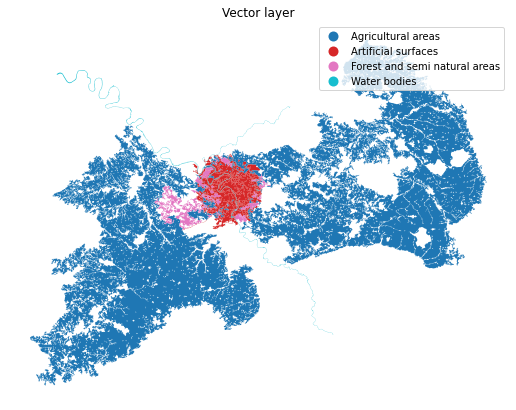

In [8]:
f, ax = plt.subplots(figsize=(14, 7))
zone_11_gdf.plot(column="land_type", legend=True, ax=ax)
plt.title("Vector layer")
ax.set_axis_off()
plt.show()

### Codes

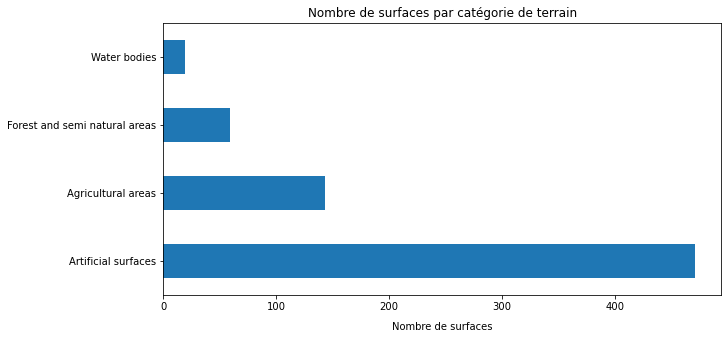

In [9]:
zone_11_gdf["land_type"].value_counts().plot.barh(figsize=(10, 5))
plt.xlabel("Nombre de surfaces", labelpad=10)
plt.title("Nombre de surfaces par catégorie de terrain");

### Area

In [10]:
zone_11_gdf.Area_Ha.describe()

count    6.920000e+02
mean     3.730443e+03
std      6.120669e+04
min      2.502368e+01
25%      3.299732e+01
50%      5.519455e+01
75%      1.256282e+02
max      1.140250e+06
Name: Area_Ha, dtype: float64

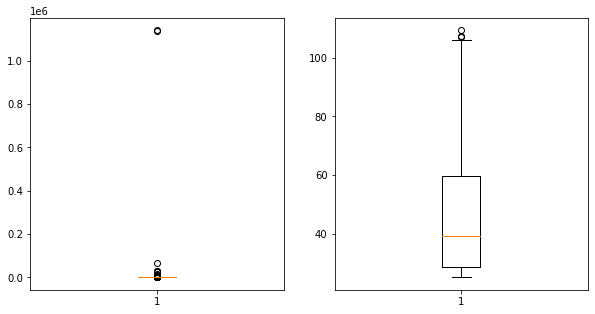

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.boxplot(zone_11_gdf.Area_Ha)
plt.subplot(122)
plt.boxplot(zone_11_gdf.Area_Ha[zone_11_gdf.Area_Ha < 110])
plt.show()

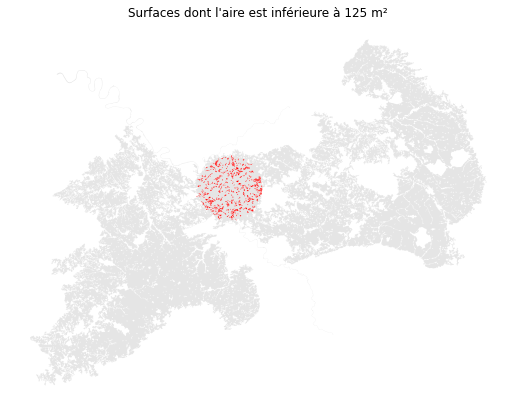

In [12]:
zone_11_gdf_area_low = zone_11_gdf[zone_11_gdf.Area_Ha < 125]
zone_11_gdf_area_high = zone_11_gdf[zone_11_gdf.Area_Ha >= 125]

f, ax = plt.subplots(figsize=(14, 7))
zone_11_gdf_area_high.plot(ax=ax, color="black", alpha=0.1)
zone_11_gdf_area_low.plot(ax=ax, color="red")
ax.set_axis_off()
plt.title("Surfaces dont l'aire est inférieure à 125 m²")
plt.show()

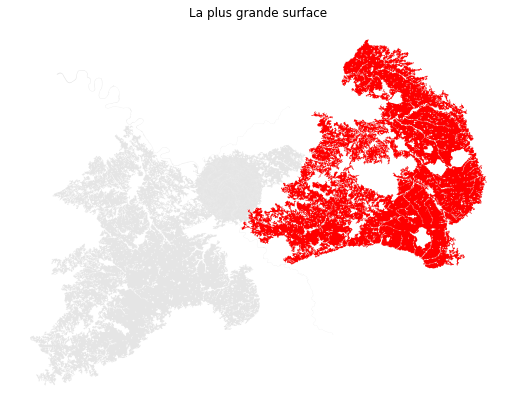

In [13]:
f, ax = plt.subplots(figsize=(14, 7))
zone_11_gdf.plot(ax=ax, color="black", alpha=0.1)
zone_11_gdf[zone_11_gdf.Area_Ha == max(zone_11_gdf.Area_Ha)].plot(ax=ax, color="red")
ax.set_axis_off()
plt.title("La plus grande surface")
plt.show()

### Voisins distants et superposés

Vérifions que les surfaces voisines se touchent et ne se superposent pas.

In [ ]:
distanced_dict = {"zone": [], "src": [], "dest": [], "distance": []}
overlapped_dict = {"zone": [], "src": [], "dest": []}

for zone in zones:
    gdf = gpd.read_file("../data/zones/zones.gpkg", layer=zone)
    print(f"{zone} ({gdf.shape[0]} instances)", end=" ")

    for index, area in gdf.iterrows():
        distances = gdf.geometry.distance(area.geometry)

        neighbors_d = gdf[(distances < 10) & (distances != 0) & (gdf.OBJECTID != area.OBJECTID)]
        zone_d = [zone] * neighbors_d.shape[0]
        src_d = [area.OBJECTID] * neighbors_d.shape[0]
        dest_d = neighbors_d.OBJECTID.tolist()
        d = distances[neighbors_d.index].tolist()

        distanced_dict["zone"].extend(zone_d)
        distanced_dict["src"].extend(src_d)
        distanced_dict["dest"].extend(dest_d)
        distanced_dict["distance"].extend(d)

        neighbors_o = gdf[(distances == 0) & (gdf.OBJECTID != area.OBJECTID)]
        neighbors_o = neighbors_o[neighbors_o.geometry.overlaps(area.geometry)]
        zone_o = [zone] * neighbors_o.shape[0]
        src_o = [area.OBJECTID] * neighbors_o.shape[0]
        dest_o = neighbors_o.OBJECTID.tolist()

        overlapped_dict["zone"].extend(zone_o)
        overlapped_dict["src"].extend(src_o)
        overlapped_dict["dest"].extend(dest_o)

    print("[ok]")

print("finished")

distanced_df = pd.DataFrame(distanced_dict)
overlapped_df = pd.DataFrame(overlapped_dict)

distanced_df.to_csv("../data/zones/distanced.csv")
overlapped_df.to_csv("../data/zones/overlapped.csv")

In [ ]:
overlapped_df = pd.read_csv("../data/zones/overlapped.csv")
overlapped_df.head()

Sur l'ensemble des données testées, il n'y a pas de surfaces qui se superposent. On considèrera donc qu'il n'y a pas de surfaces qui se superposent sur la totalité du jeu de données pour la suite.

In [ ]:
distanced_df = pd.read_csv("../data/zones/distanced.csv")
distanced_df.head()

Il semble y avoir des couples de voisins légèrement éloignés, mais il faut vérifier qu'ils sont effectivement voisins en vérifiant qu'il n'y a pas un autre terrain entre les deux par exemple.

In [ ]:
f = plt.figure(figsize=(20, 90))

i = 0
src = []
for index, neighbors in distanced_df.iterrows():
    if neighbors.dest in src:
        continue

    src.append(neighbors.src)

    # add a new subplot iteratively
    ax = plt.subplot(int(distanced_df.shape[0] / 2) + 1, 2, i + 1)
    i = i + 1

    gdf = gpd.read_file("../data/zones/zones.gpkg", layer=neighbors.zone)
    areas = gdf[gdf.OBJECTID.isin([neighbors.src, neighbors.dest])]
    areas.plot("OBJECTID", ax=ax)

    other = gdf[gdf.geometry.touches(areas.iloc[0].geometry)]
    if other.shape[0] > 0:
        other.plot(color="grey", ax=ax, alpha=0.7)

    ax.set_title(f"Voisins {neighbors.src} - {neighbors.dest}")

plt.show()

Les surfaces sont à chaque fois séparées par une autre surface. On considèrera donc qu’il n’y a pas de voisins espacés sur la totalité du jeu de données pour la suite.

## Raster

In [14]:
attributes = gpd.read_file(
    "../data/raw_data/clc/u2018_clc2018_v2020_20u1_raster100m/DATA/U2018_CLC2018_V2020_20u1.tif.vat.dbf")
attributes.head()

,Value,Count,LABEL3,Red,Green,Blue,CODE_18,geometry
0,1,800699.0,Continuous urban fabric,0.901961,0.000000,0.301961,111,None
1,2,17085234.0,Discontinuous urban fabric,1.000000,0.000000,0.000000,112,None
2,3,3210212.0,Industrial or commercial units,0.800000,0.301961,0.949020,121,None
3,4,414626.0,Road and rail networks and associated land,0.800000,0.000000,0.000000,122,None
4,5,122685.0,Port areas,0.901961,0.800000,0.800000,123,None


Les données raster contiennent les attributs rouge, vert et bleu mais pas infrarouge.

Geopandas ne gère pas les données raster, il faut un outil pour les exploiter: `rioxarray`.

À l'aide de QGIS, j'ai extrait manuellement une zone de la carte complète qui contient celle du jeu de données vectoriel.

In [ ]:
# raster = rxr.open_rasterio('data/zone-11.tif', masked=True).squeeze()
raster = rxr.open_rasterio('../data/zones/zone-11.tif').squeeze()

f, ax = plt.subplots(figsize=(14, 5))
raster.plot.imshow(ax=ax)
ax.set(title="Partie du raster centrée sur Paris")
ax.set_axis_off()
plt.show()

**Interrogation**: à quoi servent les autres données (`U2018_CLC2018_V2020_20u1.tif.ovr`, `U2018_CLC2018_V2020_20u1.tfw`...) ?

## Association vector - raster

In [ ]:
f, ax = plt.subplots(figsize=(14, 5))
zone_11_gdf.plot(ax=ax, alpha=.5, color="black")
raster.plot.imshow(ax=ax)
ax.set(title="Complete raster layer with vector overlayed")
ax.set_axis_off()
plt.show()

In [ ]:
raster_clipped = raster.rio.clip(zone_11_gdf.geometry.apply(mapping),
                                 # This is needed if your zone_11_gdf is in a diff CRS than the raster data
                                 zone_11_gdf.crs)

f, ax = plt.subplots(figsize=(14, 7))
raster_clipped.plot(ax=ax)
ax.set(title="Raster layer cropped to geodataframe extent")
ax.set_axis_off()
plt.show()

In [ ]:
test = raster.rio.clip(zone_11_gdf.geometry[1].geoms)

f, ax = plt.subplots(figsize=(14, 7))
zone_11_gdf.loc[[1], 'geometry'].plot(ax=ax, color="orange", alpha=.6)
test.plot.imshow(ax=ax)
ax.set(title="Raster layer cropped to a specific vector")
ax.set_axis_off()
plt.show()

Les données raster n'ont finalement pas l'air d'ếtre intéressantes à exploiter car on ne dispose pas de données RGB propres à chaque pixel. En effet, il semble que l'on dispose uniquement de valeurs RGB associées de manière générale aux codes CLC.